# CMS Diversity Analysis:
### Comparing the USCMS to the full CMS Collaboration

This notebook will visualize and report the diversity statistics for the USCMS institutions relative to the full CMS Collaboration.  The statistics can be filtered by year, gender, role, activity and authorship. The visualization will further separate the filtered group of individuals by institute.

### Import `python` libraries

In [1]:
import os, json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.lines import Line2D
import ipywidgets as widgets
from scipy import stats

Import the `json` data file `json_analysis.json`.  This file is created from `combine_json.ipynb` which should be run before this notebook.  Display the available years in the `json` file.

In [2]:
with open( "Data/json_analysis.json" ) as json_file:
    data = json.load( json_file )
print( ">> json_analysis.json contains years: {}".format( list( data.keys() ) ) )

>> json_analysis.json contains years: ['2015', '2016', '2017', '2018', '2019', '2020']


Distinguish between the USCMS institutes and full CMS Collaboration institutes into separate datasets.

In [3]:
with open( "Data/institutes_new.json" ) as json_file:
    institutes = json.load( json_file )

us_institutes = [ institute["code"] for institute in institutes if institute["country"].lower() == "usa" ]
    
print( ">> Number of CMS institutions: {}".format( len(institutes) ) )
print( ">> Number of USCMS institutions: {}".format( len(us_institutes) ) )

>> Number of CMS institutions: 536
>> Number of USCMS institutions: 80


## Select the filters
Select the project, activities authorship status and years to report on.  

In [4]:
options = {
    "PROJECT": [],
    "ACTIVITY": [],
    "COUNTRY": list( set( [ institute["country"] for institute in institutes ] ) ),
    "AUTHOR": [],
    "YEARS": []
}

for year in list( data.keys() ):
    options[ "YEARS" ].append( year )
    for cms_id in data[ year ]:
        for project in data[ year ][ cms_id ][ "PROJECT" ]:
            if project not in options[ "PROJECT" ]: options[ "PROJECT" ].append( project.upper() )
        if data[ year ][ cms_id ][ "ACTIVITY" ].upper() not in options[ "ACTIVITY" ]: options[ "ACTIVITY" ].append( data[ year ][ cms_id ][ "ACTIVITY" ].upper() )
        if data[ year ][ cms_id ][ "AUTHOR" ]   not in options[ "AUTHOR" ]:   options[ "AUTHOR" ].append( data[ year ][ cms_id ][ "AUTHOR" ] )

Select years to report:

In [5]:
years = widgets.SelectMultiple( options = options[ "YEARS" ], value = [ options[ "YEARS"][-1] ] )
years

SelectMultiple(index=(5,), options=('2015', '2016', '2017', '2018', '2019', '2020'), value=('2020',))

Select authorship status to report:

In [6]:
author_legend = {
    "AUTHORS": [ True ],
    "ALL MEMBERS": [ True, False, None ],
    "NON-AUTHORS:": [ False ],
    "REPORTED MEMBERS": [ True, False ],
    "UNREPORTED MEMBERS": [ None ],
    "AUTHORS and UNREPORTED": [ True, None ],
    "NON-AUTHORS and UNREPORTED": [ False, None ]
}
author = widgets.SelectMultiple( options = options[ "AUTHOR" ], value = [ True ] )
author

SelectMultiple(index=(0,), options=(True, False, None), value=(True,))

Select project(s) to report:

In [7]:
projects = widgets.SelectMultiple( options = options[ "PROJECT" ] )
projects

SelectMultiple(options=('ECAL', 'OFFLINE AND COMPUTING', 'HCAL', 'TRACKER', 'L1 TRIGGER', 'MUON-RPC', 'UPGRADE…

Select activity(s) to report:

In [8]:
activities = widgets.SelectMultiple( options = options[ "ACTIVITY" ], value = [ "DOCTORAL STUDENT", "PHYSICIST" ] )
activities

SelectMultiple(index=(0, 1), options=('DOCTORAL STUDENT', 'PHYSICIST', 'ENGINEER', 'ENGINEER ELECTRONICS', 'NO…

Select country(s) to report (default = `USA`):

In [9]:
countries = widgets.SelectMultiple( options = sorted( options[ "COUNTRY" ] ), value = ["USA"] )
countries

SelectMultiple(index=(59,), options=('Armenia', 'Australia', 'Austria', 'Bahrain', 'Belarus', 'Belgium', 'Braz…

## Obtain the filtered statistics

In [68]:
institute_list = np.array( [ list( institute.values() ) for institute in institutes  ] )

count = {
    str( year ): {
        "MALE": {
            "COUNTRIES": 0,
            "CMS": 0
        },
        "FEMALE": {
            "COUNTRIES": 0,
            "CMS": 0
        },
        "NONE": {
            "COUNTRIES": 0,
            "CMS": 0
        }
    } for year in years.value
}

for year in years.value:
    for cms_id in data[ year ]:
        this_index = np.argwhere( institute_list[:,0] == data[ year ][ cms_id ][ "INSTITUTE" ] )[0,0]
        this_country = institute_list[ this_index, 1 ]
        if data[ year ][ cms_id ][ "AUTHOR" ] in list( author.value ):
            if data[ year ][ cms_id ][ "ACTIVITY" ].upper() in list( activities.value ):
                for project in data[ year ][ cms_id ][ "PROJECT" ]:
                    if project.upper() in list( projects.value ):
                        if data[ year ][ cms_id ][ "GENDER" ] == "F":
                            count[ year ][ "FEMALE" ][ "CMS" ] += 1
                            if this_country.upper() in list( countries.value ):
                                count[ year ][ "FEMALE" ][ "COUNTRIES" ] += 1
                        if data[ year ][ cms_id ][ "GENDER" ] == "M":
                            count[ year ][ "MALE" ][ "CMS" ] += 1
                            if this_country.upper() in list( countries.value ):
                                count[ year ][ "MALE" ][ "COUNTRIES" ] += 1
                        if data[ year ][ cms_id ][ "GENDER" ] == None:
                            count[ year ][ "NONE" ][ "CMS" ] += 1
                            if this_country.upper() in list( countries.value ):
                                count[ year ][ "NONE" ][ "COUNTRIES" ] += 1

In [72]:
print( "For the following parameters...")
print( ">> Selected years:" )
print( "   o {}".format( list( years.value ) ) )
print( ">> Selected authorship status:" )
print( "   o {}".format( [ str(key) for key in author_legend if list( author.value ) == author_legend[ key ] ] ) )
print( ">> Selected projects:" )
print( "   o {}".format( list( projects.value ) ) )
print( ">> Selected activities:" )
print( "   o {}".format( list( activities.value ) ) )
print( ">> Seleted countries:" )
print( "   o {}".format( list( countries.value ) ) )
print( "\n\n")

for year in years.value:
    cms_total = count[ year ][ "MALE" ][ "CMS" ] + count[ year ][ "FEMALE" ][ "CMS" ] + count[ year ][ "NONE" ][ "CMS" ]
    country_total = count[ year ][ "MALE" ][ "COUNTRIES" ] + count[ year ][ "FEMALE" ][ "COUNTRIES" ] + count[ year ][ "NONE" ][ "COUNTRIES" ]
    if cms_total != 0: 
        print( ">> Year: {}".format( year ) )
        print( "   o CMS Female: {} / {} ({:.2f}%)".format(
            count[ year ][ "FEMALE" ][ "CMS" ],
            this_total,
            100. * float( count[ year ][ "FEMALE" ][ "CMS" ] ) / float( cms_total ) 
        ) )
        print( "   o CMS Male: {} / {} ({:.2f}%)".format(
            count[ year ][ "MALE" ][ "CMS" ],
            this_total,
            100. * float( count[ year ][ "MALE" ][ "CMS" ] ) / float( cms_total ) 
        ) )
    else: 
        print( "[ERR] No CMS individuals were found in this category for {}...".format( year ) )
    if country_total != 0:
        print( "   o COUNTRIES Female: {} / {} ({:.2f}%)".format(
            count[ year ][ "FEMALE" ][ "COUNTRIES" ],
            this_total,
            100. * float( count[ year ][ "FEMALE" ][ "COUNTRIES" ] ) / float( country_total ) 
        ) )
        print( "   o COUNTRIES Male: {} / {} ({:.2f}%)".format(
            count[ year ][ "MALE" ][ "CMS" ],
            this_total,
            100. * float( count[ year ][ "MALE" ][ "COUNTRIES" ] ) / float( country_total ) 
        ) )
    else:
        print( "[ERR] No COUNTRIES individuals were found in this category for {}...".format( year ) )

For the following parameters...
>> Selected years:
   o ['2017', '2018', '2019', '2020']
>> Selected authorship status:
   o ['AUTHORS']
>> Selected projects:
   o ['MTD']
>> Selected activities:
   o ['DOCTORAL STUDENT', 'PHYSICIST']
>> Seleted countries:
   o ['USA']



[ERR] No CMS individuals were found in this category for 2017...
[ERR] No COUNTRIES individuals were found in this category for 2017...
[ERR] No CMS individuals were found in this category for 2018...
[ERR] No COUNTRIES individuals were found in this category for 2018...
>> Year: 2019
   o CMS Female: 13 / 76 (24.53%)
   o CMS Male: 40 / 76 (75.47%)
   o COUNTRIES Female: 7 / 76 (25.93%)
   o COUNTRIES Male: 40 / 76 (74.07%)
>> Year: 2020
   o CMS Female: 24 / 76 (31.58%)
   o CMS Male: 52 / 76 (68.42%)
   o COUNTRIES Female: 13 / 76 (32.50%)
   o COUNTRIES Male: 52 / 76 (67.50%)


## Visualize the filtered statistics by year

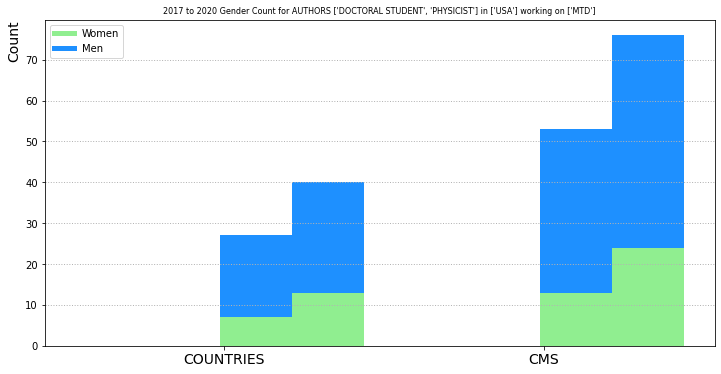

In [113]:
width = 0.9 / len( years.value )
x = np.arange( 2 )

plt.figure( figsize = (12,6) )
ax = plt.subplot(111)

for i, year in enumerate( list( years.value ) ):
    ax.bar( x + width * i, list( count[ year ][ "FEMALE" ].values() ), width, color = "lightgreen" )
    ax.bar( x + width * i, list( count[ year ][ "MALE" ].values() ), width, bottom = list( count[ year ][ "FEMALE" ].values() ), color = "dodgerblue" )

    
ax.set_title( "{} to {} Gender Count for {} {} in {} working on {}".format( 
    years.value[0], years.value[-1],
    [ str(key) for key in author_legend if list( author.value ) == author_legend[ key ] ][0], 
    list(activities.value), list(countries.value), list(projects.value)
), fontsize = 8 )
ax.set_ylabel( "Count", y = 1.0, ha = "right", fontsize = 14 )
ax.set_xticks( x + 0.35 )
ax.set_xticklabels( [ "COUNTRIES", "CMS" ], fontsize = 14 )

custom_legend = [
  Line2D( [0], [0], color = "lightgreen", lw = 5 ),
  Line2D( [0], [0], color = "dodgerblue", lw = 5 )
]
ax.legend( custom_legend, [ "Women", "Men" ], loc = 2 )

ax.set_facecolor("white")
ax.grid( b=True, which="major", axis="y", color = [0.7,0.7,0.7], linestyle = ":", linewidth = 1)
plt.show()